In [1]:
import numpy as np
from matplotlib import pyplot as plt

nt = 100
nxy = 100
n_per_t = 20
D = 0.01
cell_num = 50
dt = 0.1
tau = 5
gamma = 0.01
air_conc = 10

x_lim = [-1,1]
y_lim = [-1,5]

x_0 = sum(x_lim)/2
y_0 = y_lim[0]
u_0 = 0
v_0 = .5
phi_0 = 1

x_space = np.linspace(x_lim[0],x_lim[1],nxy)
y_space = np.linspace(y_lim[0],y_lim[1],nxy)

cells_x = np.linspace(x_lim[0],x_lim[1],cell_num)        
diff_x = np.diff(cells_x)[0]

cells_y = np.linspace(y_lim[0],y_lim[1],cell_num)        
diff_y = np.diff(cells_y)[0]

sum_phi = np.zeros((cells_x.size,cells_y.size,nt))
stdev_phi = np.zeros((cells_x.size,cells_y.size,nt))
count = np.zeros((cells_x.size,cells_y.size,nt))
av_phi = np.zeros((cells_x.size,cells_y.size,nt))

particles = []
all_particles = []


def step(x,y,u,v):
    u += -gamma*u*dt+np.sqrt(2*D)*np.random.normal()*np.sqrt(dt)
    v += -gamma*v*dt+np.sqrt(2*D)*np.random.normal()*np.sqrt(dt)

    x += u*dt
    y += v*dt

    condition = False
    if x > x_lim[1]:
        condition = True
    elif x < x_lim[0]:
        condition = True

    if y > y_lim[1]:
        condition = True
    elif y < y_lim[0]:
        condition = True

    return x,y,u,v,condition

for t in range(nt):
    new_particles = []
    # Initialise new particles
    for n_new in range(n_per_t):
        particles.append([x_0,y_0,phi_0,u_0,v_0])
    for i in range(len(particles)):
        x,y,u,v,condition = step(particles[i][0],particles[i][1],particles[i][3],particles[i][4])
        if not condition:
            index_x = int(np.floor(x/diff_x) + (cell_num)/(x_lim[1]-x_lim[0]))
            index_y = int(np.floor(y/diff_y) + (cell_num)/(y_lim[1]-y_lim[0]))
            if t==0:
                phi = dt*(-particles[i][2])/(tau) + particles[i][2]
            else:
                phi = dt*(av_phi[index_x,index_y,t-1] - particles[i][2])/(tau) + particles[i][2]
            count[index_x,index_y,t] += 1
            sum_phi[index_x,index_y,t] += phi
            stdev_phi[index_x,index_y,t] += (phi-av_phi[index_x,index_y,t-1])**2

            
            new_particles.append([x,y,phi,u,v])
            
    av_phi[:,:,t] = sum_phi[:,:,t]/(air_conc + count[:,:,t])
    stdev_phi[:,:,t] = np.sqrt(stdev_phi[:,:,t]/(air_conc + count[:,:,t]-1))
    
    particles = new_particles
    all_particles.append(particles)
    
lower_phi = av_phi - 2*stdev_phi
lower_phi[lower_phi<0] = 0

higher_phi = av_phi + 2*stdev_phi

min_val = np.min(lower_phi)
max_val = np.max(higher_phi)

C:\Users\Sam\anaconda3\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


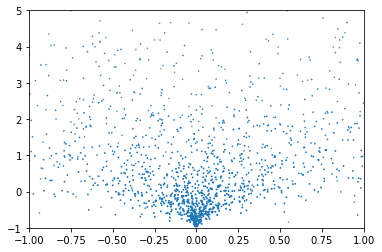

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig1 = plt.figure()
ax1 = plt.axes(xlim=(x_lim[0], x_lim[1]),ylim=(y_lim[0],y_lim[1]))
scatter = ax1.scatter(all_particles[0][:][0], all_particles[0][:][1],s =100*(np.array(all_particles[0][:][2])))
def update_scatter(frame):
    scatter.set_offsets(np.array(all_particles[frame])[:,0:2])
    scatter.set_sizes(np.array(all_particles[frame])[:,2])
    return scatter,

ani_scatter = FuncAnimation(fig1, update_scatter, frames=range(1,len(all_particles)), blit=True)
ani_scatter.save('diffusing_particles_mixing.gif')

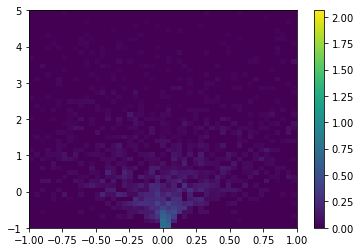

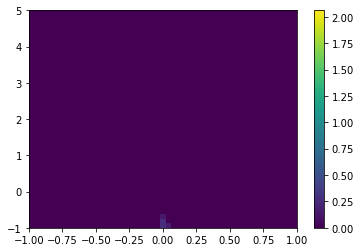

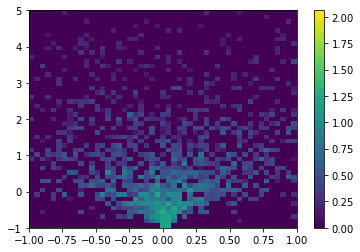

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

X,Y = np.meshgrid(cells_x,cells_y)

fig2 = plt.figure()
ax2 = plt.axes(xlim=(x_lim[0], x_lim[1]),ylim=(y_lim[0],y_lim[1]))

fig3 = plt.figure()
ax3 = plt.axes(xlim=(x_lim[0], x_lim[1]),ylim=(y_lim[0],y_lim[1]))

fig4 = plt.figure()
ax4 = plt.axes(xlim=(x_lim[0], x_lim[1]),ylim=(y_lim[0],y_lim[1]))

av_plot = ax2.pcolormesh(X,Y,av_phi[:-1,:-1,0].T, vmin=min_val, vmax=max_val)
lower_plot = ax3.pcolormesh(X,Y,lower_phi[:-1,:-1,0].T, vmin=min_val, vmax=max_val)
higher_plot = ax4.pcolormesh(X,Y,higher_phi[:-1,:-1,0].T, vmin=min_val, vmax=max_val)


def update_av_colourplot(frame):
    av_plot.set_array(av_phi[:-1,:-1,frame].T)
    return av_plot,

def update_lower_colourplot(frame):
    lower_plot.set_array(lower_phi[:-1,:-1,frame].T)
    return lower_plot,

def update_higher_colourplot(frame):
    higher_plot.set_array(higher_phi[:-1,:-1,frame].T)
    return higher_plot,

fig2.colorbar(av_plot)
ani_av_colourplot = FuncAnimation(fig2, update_av_colourplot, frames=[0,0,0,0,0,*range(av_phi.shape[2])], blit=True)

fig3.colorbar(lower_plot)
ani_lower_colourplot = FuncAnimation(fig3, update_lower_colourplot, frames=[0,0,0,0,0,*range(av_phi.shape[2])], blit=True)

fig4.colorbar(higher_plot)
ani_higher_colourplot = FuncAnimation(fig4, update_higher_colourplot, frames=[0,0,0,0,0,*range(av_phi.shape[2])], blit=True)


ani_av_colourplot.save('average_mixing_spray_colourmap.gif')
ani_lower_colourplot.save('lower_mixing_spray_colourmap.gif')
ani_higher_colourplot.save('higher_mixing_spray_colourmap.gif')